# Project 1 - Golem EiTI
## Students dataset from [Kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams/version/1) described and trained by ML
### Done by Wojciech Sitek ([github.com](github.com/wojtsit))
Dataset represents students from USA and their exams scores depending on their characteristic features. This project divides into two parts:
0. IMPORT
1. GRAPHS - Description of data (using Python Data Science libraries)
2. ML - Different training methods to achieve best accuracy

## 0. Import
1. Random rows
2. Dataset basic information
3. Conclusion

In [1]:
#Import Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

#Read dataset from CSV
data=pd.read_csv('Dataset/StudentsPerformance.csv')

#Print sample of random rows
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
89,female,group D,some high school,standard,none,73,86,82
750,male,group D,some high school,standard,completed,71,69,68
942,male,group C,high school,standard,none,81,66,64
131,male,group C,some high school,free/reduced,completed,53,37,40
273,female,group D,some college,standard,none,65,70,71


In [2]:
#Print information about columns and objects
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


This information implies that:
- there are 1000 students listed
- all data is not null - there is no need to prepare data (apart from get_dummies function before ML part)
- it can be discovered from sample that data is probably very organised. This will be checked later.
- only exam scores are integer values - they can be described

## 1. GRAPHS
In this part there will come the description of the relationships between different columns and factors.

In [3]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


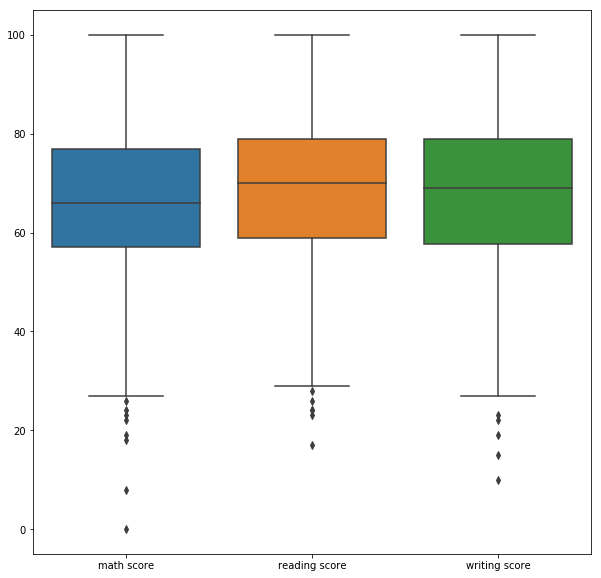

In [4]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.boxplot(data = data)

Graph and table show that scores from different subjects have very similar plot - all parameters are close (like mean, std, etc.)

In [5]:
data.describe(include = [np.object])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [7]:
data.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

As it is shown, gender plot is rather equalised.

In [ ]:
//TODO FINISHED HERE

In [6]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Exam scores are quite strongly correlated. This implies that students often had **similar results** for all exams. The best correlation is between writing and reading score which matches our intuition - math skills are more apart from humanistic disciplines.